# Notebook para Exploratory Data Analysis (EDA)

## Importação das Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import zipfile
import os

## Visualização dos dados

In [ ]:
PATH_ARQUIVO_ZIP = '../data/raw/dados_obitos_sim_2006_2017.zip'

In [4]:
# Extração do zip do arquivo bruto
if os.path.exists(PATH_ARQUIVO_ZIP):
    with zipfile.ZipFile(PATH_ARQUIVO_ZIP, 'r') as zip_ref:
        zip_ref.extractall('../data/raw/')
else:
    print(f'Arquivo {PATH_ARQUIVO_ZIP} não existe. Talvez você esqueceu de executar um dvc pull ...')

In [ ]:
# Após extrair o zip, pode-se abrir o .csv com o pandas
df = pd.read_csv('../data/raw/sim_2006_2017.csv')

/tmp/ipykernel_1382/267430639.py:2: DtypeWarning: Columns (5,25,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/sim_2006_2017.csv')


## EDA Manual

### Entendendo as features

In [ ]:
# Número de linhas e colunas
df.shape

(3237593, 51)

In [ ]:
# Nome das colunas
df.columns

Index(['ACIDTRAB', 'ASSISTMED', 'ATESTANTE', 'CAUSABAS', 'CAUSABAS_O',
       'CIRCOBITO', 'CIRURGIA', 'CODESTAB', 'CODINST', 'CODMUNOCOR',
       'CODMUNRES', 'DTATESTADO', 'DTCADASTRO', 'DTINVESTIG', 'DTNASC',
       'DTOBITO', 'DTRECEBIM', 'ESC', 'ESCMAE', 'ESTCIV', 'EXAME', 'FONTE',
       'FONTEINV', 'GESTACAO', 'GRAVIDEZ', 'HORAOBITO', 'IDADE', 'IDADEMAE',
       'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'LOCOCOR', 'NATURAL',
       'NECROPSIA', 'NUMERODN', 'NUMERODO', 'OBITOGRAV', 'OBITOPARTO',
       'OBITOPUERP', 'OCUP', 'OCUPMAE', 'PARTO', 'PESO', 'QTDFILMORT',
       'QTDFILVIVO', 'RACACOR', 'SEXO', 'TIPOBITO', 'TPPOS'],
      dtype='object')

In [ ]:
# Exclusão de quaisquer colunas com 50% ou mais de valores vazios
NA_val = df.isna().sum()
def na_filter(na, threshold = .5):
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass

df = df[na_filter(NA_val)]

In [ ]:
# Nesse dataset, só existem óbitos não fetais
# Porém, existem algumas colunas que são exclusivas para óbitos fetais.
# Logo elas podem ser descartadas
df["TIPOBITO"].unique()

array([2])

In [ ]:
# Remoção de colunas que não convém
df = df.drop(columns=["ATESTANTE", "CAUSABAS_O", "CODESTAB", "CODINST", "CODMUNOCOR",
                      "CODMUNRES", "DTATESTADO", "DTCADASTRO", "DTNASC", "DTRECEBIM", "LINHAA", "LINHAB",
                      "LINHAC", "NECROPSIA", "NUMERODO", "TIPOBITO", "TPPOS"])

In [ ]:
# Nome das colunas restantes
df.columns

Index(['ASSISTMED', 'CAUSABAS', 'DTOBITO', 'ESC', 'ESTCIV', 'HORAOBITO',
       'IDADE', 'LOCOCOR', 'NATURAL', 'OCUP', 'RACACOR', 'SEXO'],
      dtype='object')

In [ ]:
# Olhada nos dados
# É possível observar as colunas com somente valores NaN
df.head()

,ASSISTMED,CAUSABAS,DTOBITO,ESC,ESTCIV,HORAOBITO,IDADE,LOCOCOR,NATURAL,OCUP,RACACOR,SEXO
0,NaN,R092,9022006,9.0,4.0,130.0,463.0,3.0,NaN,999993.0,1.0,1
1,NaN,R98,26012006,2.0,2.0,1130.0,481.0,3.0,NaN,214305.0,NaN,1
2,1.0,R092,19032006,2.0,3.0,1520.0,493.0,3.0,NaN,514105.0,1.0,2
3,1.0,R99,21112006,2.0,1.0,1000.0,489.0,3.0,77.0,214305.0,1.0,1
4,NaN,R98,16042006,9.0,3.0,2130.0,480.0,3.0,NaN,NaN,1.0,2


In [ ]:
# Valores únicos de cada variável
# É possivel verificar colunas "redundantes", com pouquíssimos valores distintos
df.nunique(axis=0)

ASSISTMED       3
CAUSABAS     6245
DTOBITO      4383
ESC             7
ESTCIV          6
HORAOBITO    4401
IDADE         250
LOCOCOR         6
NATURAL       237
OCUP         2220
RACACOR         6
SEXO            4
dtype: int64

In [ ]:
# Descrição do dataframe
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,ASSISTMED,DTOBITO,ESC,ESTCIV,IDADE,LOCOCOR,NATURAL,OCUP,RACACOR,SEXO
count,1762473.000000,3237593.000000,2697753.000000,3048594.000000,3236944.000000,3237591.000000,2280507.000000,2477521.000000,3107476.000000,3237593.000000
mean,1.933994,15758463.709103,3.611096,2.428918,461.141414,1.548505,803.195749,826337.314797,1.595774,1.444785
std,2.414693,8789155.369934,2.537835,1.429391,54.780199,1.042870,141.681176,265871.134419,1.135078,0.499555
min,1.000000,1012006.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,8082007.000000,2.000000,2.000000,454.000000,1.000000,829.000000,715210.000000,1.000000,1.000000
50%,1.000000,16022016.000000,3.000000,2.000000,469.000000,1.000000,835.000000,999992.000000,1.000000,1.000000
75%,1.000000,23102007.000000,4.000000,3.000000,481.000000,2.000000,835.000000,999993.000000,1.000000,2.000000
max,9.000000,31122017.000000,9.000000,9.000000,999.000000,9.000000,999.000000,999994.000000,9.000000,9.000000


### Tratamento dos Dados

* A coluna CAUSABAS apresenta a causa básica do óbito de acordo com a CID. Para melhor análise a ideia é classifica-los em suicidio ou não suicídio

* CAUSABAS de X600 a X849 são considerados óbitos por lesão auto provocada


In [ ]:
range_suicidio = [f"X{i}" for i in range(600, 850)]
df["SUICIDIO"] = df.apply(lambda row: 1 if row["CAUSABAS"] in range_suicidio else 0, axis=1)
del df["CAUSABAS"]

In [ ]:
# Contagens de óbitos por súicidio e por outras causas
df["SUICIDIO"].value_counts()

SUICIDIO
0    3212973
1      24620
Name: count, dtype: int64

In [ ]:
# Porcentagem de óbitos por suícidio
(24620 / 3237593) * 100

0.7604414761213037

### Analisando as correlações

<Axes: >

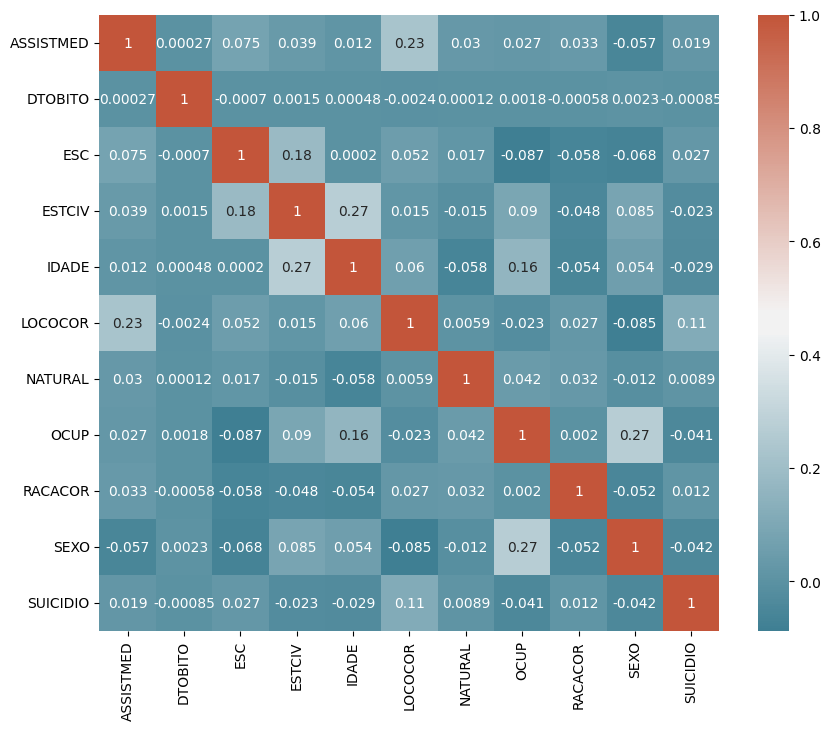

In [7]:
# Plot do heatmap de correlação das variáveis
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, sep=10, as_cmap=True))

### Gráficos

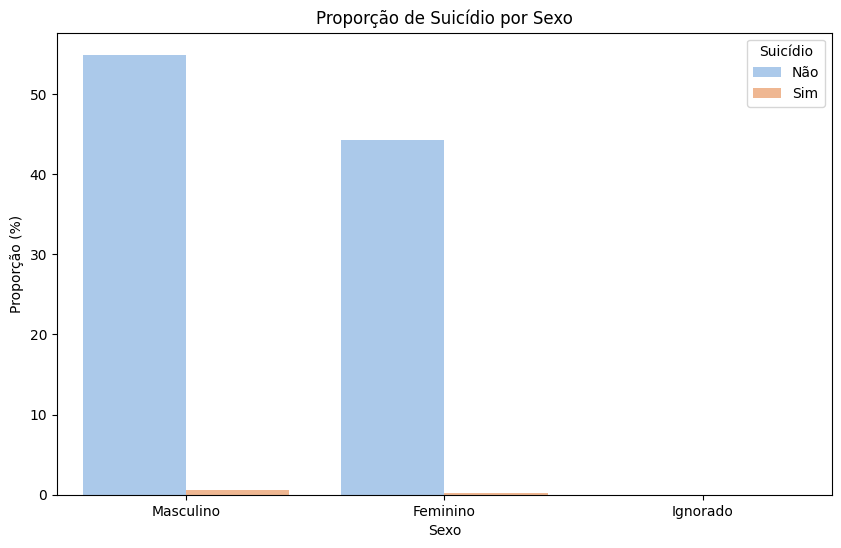

In [28]:
# Mapeamento de valores
sexo_labels = {0: 'Ignorado', 1: 'Masculino', 2: 'Feminino'}
suicidio_labels = {0: 'Não', 1: 'Sim'}

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['SEXO'].map(sexo_labels), hue=df['SUICIDIO'].map(suicidio_labels), palette='pastel', dodge=True, stat='percent')
plt.xlabel('Sexo')
plt.ylabel('Proporção (%)')
plt.title('Proporção de Suicídio por Sexo')
plt.legend(title='Suicídio')
plt.show()

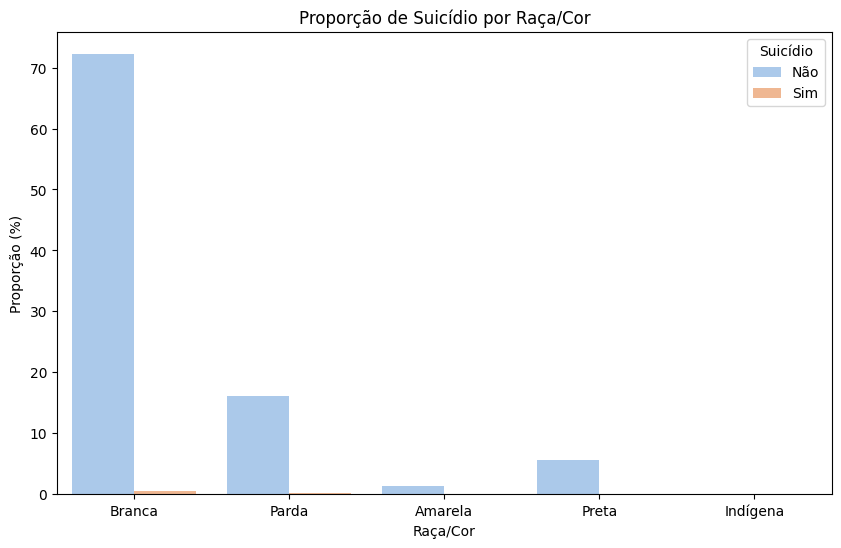

In [19]:
# Mapeamento de valores
racacor_labels = {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena'}
suicidio_labels = {0: 'Não', 1: 'Sim'}

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['RACACOR'].map(racacor_labels), hue=df['SUICIDIO'].map(suicidio_labels), palette='pastel', dodge=True, stat='percent')
plt.xlabel('Raça/Cor')
plt.ylabel('Proporção (%)')
plt.title('Proporção de Suicídio por Raça/Cor')
plt.legend(title='Suicídio')
plt.show()

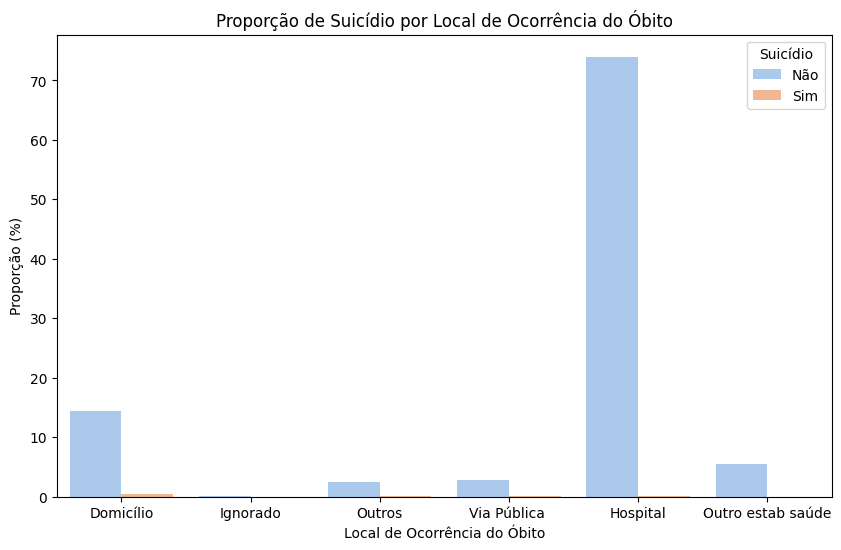

In [29]:
# Mapeamento de valores
lococor_labels = {1: 'Hospital', 2: 'Outro estab saúde', 3: 'Domicílio', 4:'Via Pública ', 5: 'Outros', 9: 'Ignorado'}
suicidio_labels = {0: 'Não', 1: 'Sim'}

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['LOCOCOR'].map(lococor_labels), hue=df['SUICIDIO'].map(suicidio_labels), palette='pastel', dodge=True, stat='percent')
plt.xlabel('Local de Ocorrência do Óbito')
plt.ylabel('Proporção (%)')
plt.title('Proporção de Suicídio por Local de Ocorrência do Óbito')
plt.legend(title='Suicídio')
plt.show()

<Axes: xlabel='IDADE', ylabel='SUICIDIO'>

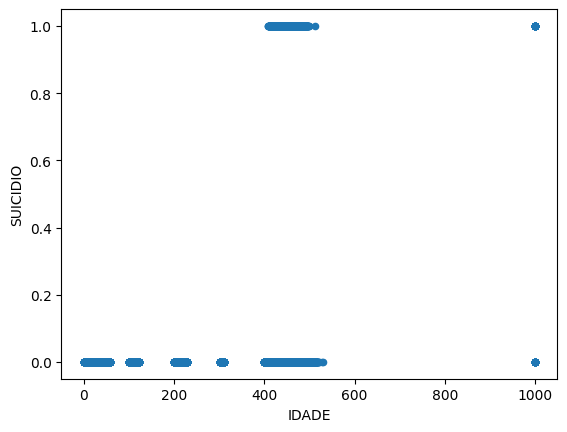

In [12]:
df.plot(kind='scatter', x='IDADE', y='SUICIDIO')

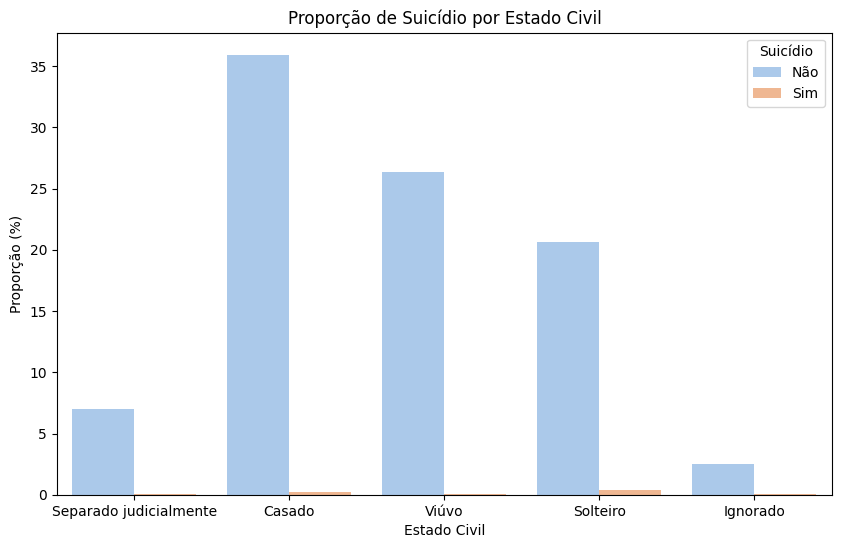

In [27]:
# Mapeamento de valores
est_civ_labels = {1: 'Solteiro', 2: 'Casado', 3: 'Viúvo', 4:'Separado judicialmente', 9: 'Ignorado'}
suicidio_labels = {0: 'Não', 1: 'Sim'}

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['ESTCIV'].map(est_civ_labels), hue=df['SUICIDIO'].map(suicidio_labels), palette='pastel', dodge=True, stat='percent')
plt.xlabel('Estado Civil')
plt.ylabel('Proporção (%)')
plt.title('Proporção de Suicídio por Estado Civil')
plt.legend(title='Suicídio')
plt.show()

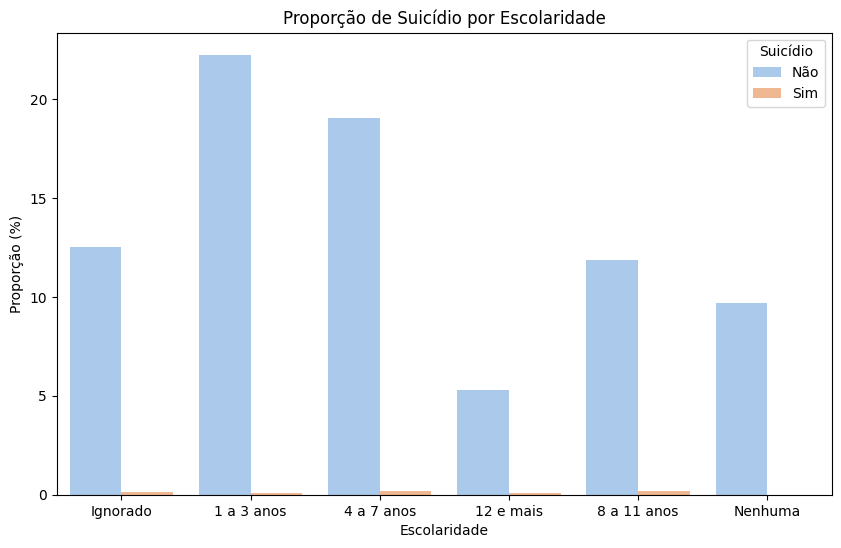

In [25]:
# Mapeamento de valores
esc_labels = {1: 'Nenhuma', 2: '1 a 3 anos', 3: '4 a 7 anos', 4:'8 a 11 anos', 5:'12 e mais', 9: 'Ignorado'}
suicidio_labels = {0: 'Não', 1: 'Sim'}

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['ESC'].map(esc_labels), hue=df['SUICIDIO'].map(suicidio_labels), palette='pastel', dodge=True, stat='percent')
plt.xlabel('Escolaridade')
plt.ylabel('Proporção (%)')
plt.title('Proporção de Suicídio por Escolaridade')
plt.legend(title='Suicídio')
plt.show()

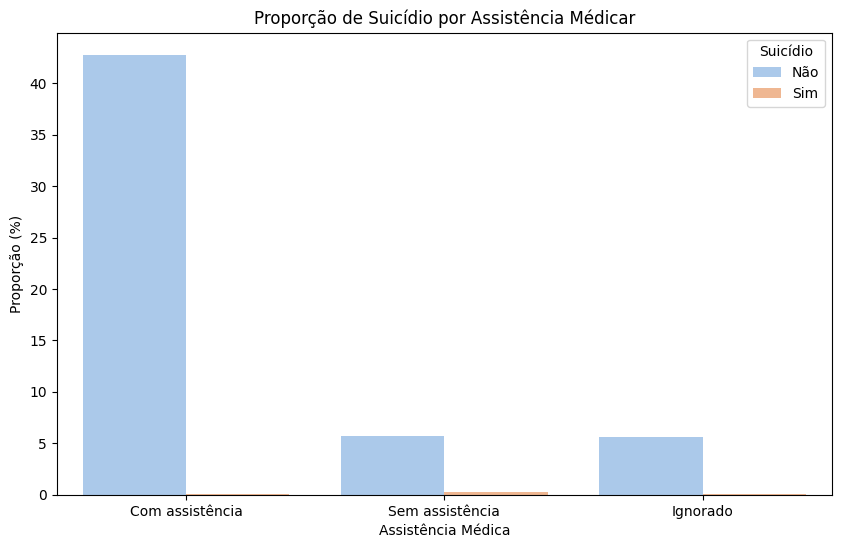

In [23]:
# Mapeamento de valores
assist_labels = {1: 'Com assistência', 2: 'Sem assistência', 9: 'Ignorado'}
suicidio_labels = {0: 'Não', 1: 'Sim'}

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['ASSISTMED'].map(assist_labels), hue=df['SUICIDIO'].map(suicidio_labels), palette='pastel', dodge=True, stat='percent')
plt.xlabel('Assistência Médica')
plt.ylabel('Proporção (%)')
plt.title('Proporção de Suicídio por Assistência Médica')
plt.legend(title='Suicídio')
plt.show()

## EDA Automatizada

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/mnt/c/Users/arthu/Desktop/Grupo/Aprendizado de Maquina/Apoio-vida/apoio-venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/mnt/c/Users/arthu/Desktop/Grupo/Aprendizado de Maquina/Apoio-vida/apoio-venv/lib/python3.10/site-packages/ydata_profiling/model/missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Salvamento dos dados

In [ ]:
df.to_parquet("../data/interim/sim_2006_2017.parquet")